In [1]:
import ee
import geemap
ee.Initialize()
import matplotlib.pyplot as plt
from geemap import cartoee

In [2]:
Tahun='2012'
dataset = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date(Tahun+'-01-01', Tahun+'-9-01'));
nighttime = dataset.select('avg_rad');
nighttimeVis = {'min':0,'max':20};

region = [110.9670, -7.3976, 109.6742, -8.1814]

dataset = ee.ImageCollection('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS').filter(ee.Filter.date('1992-01-01', '1992-12-31'))
nighttime = dataset.select('avg_vis')
nighttimeVis = {'min': 3.0,'max': 60.0,}

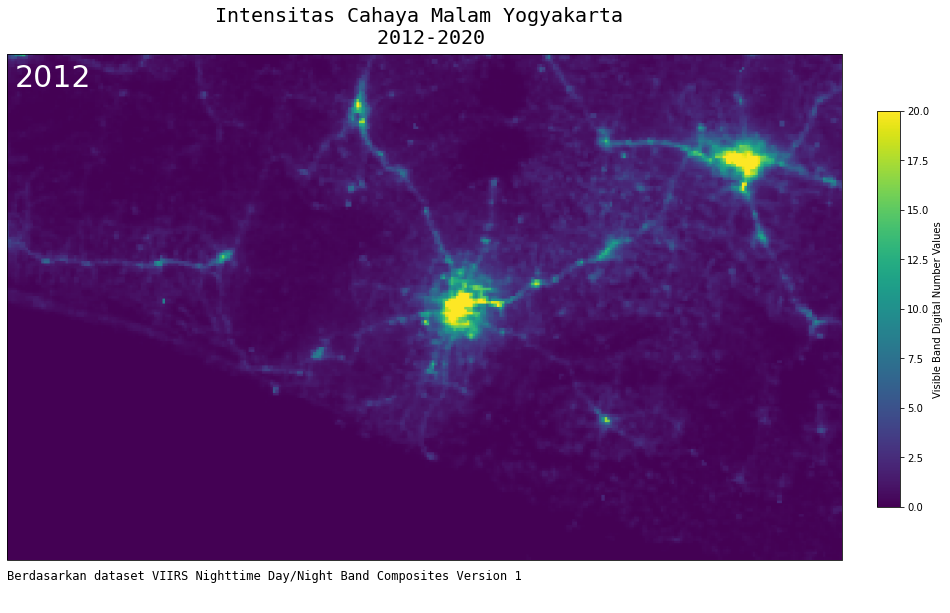

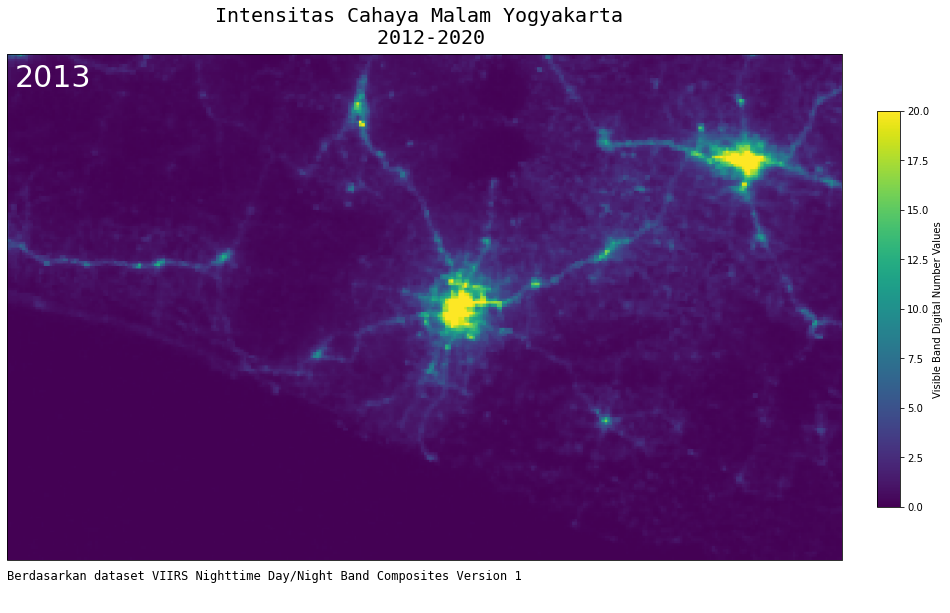

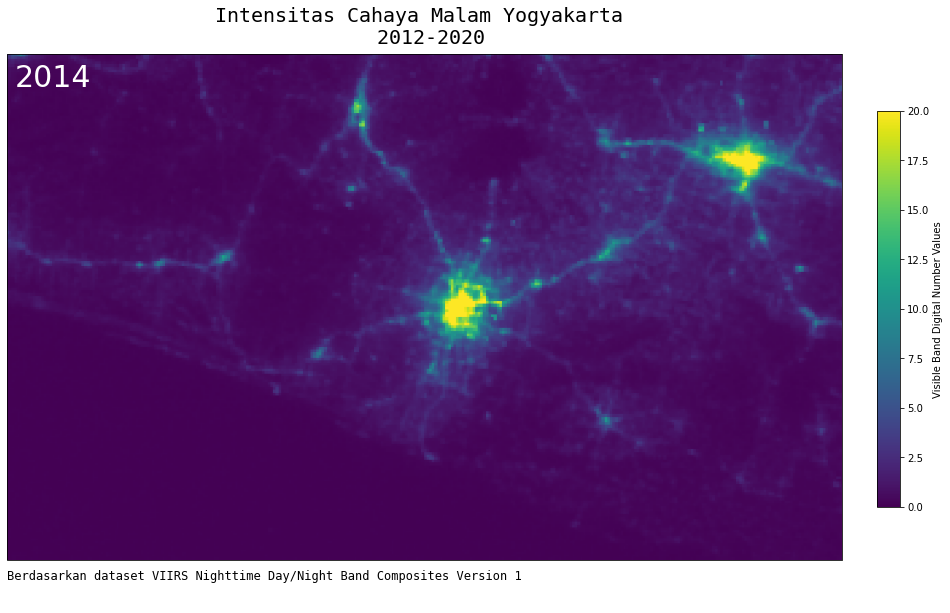

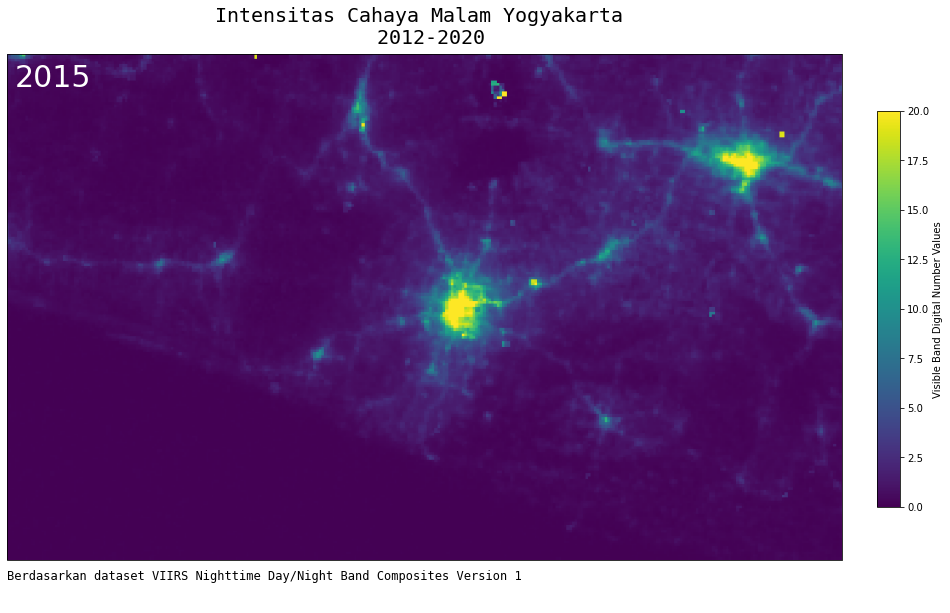

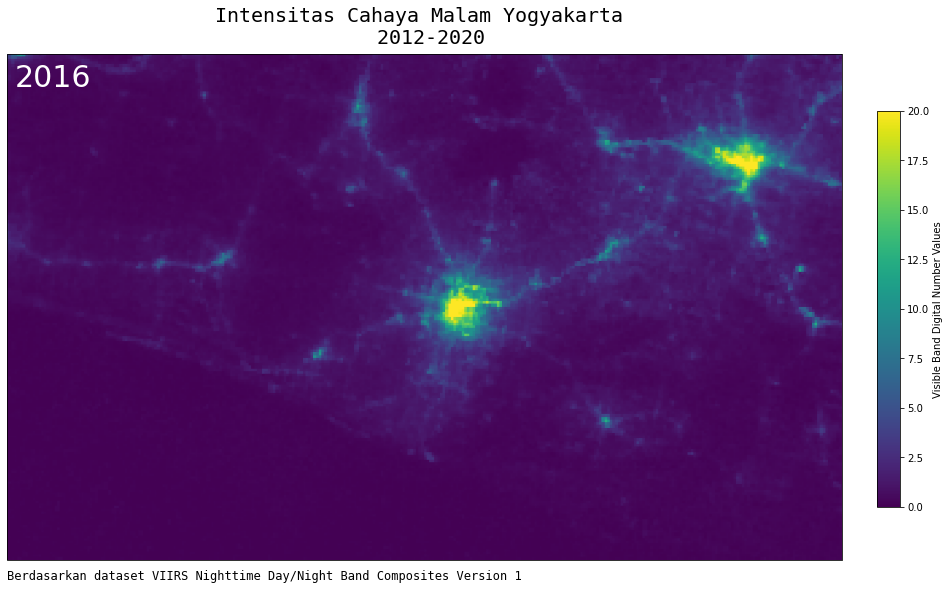

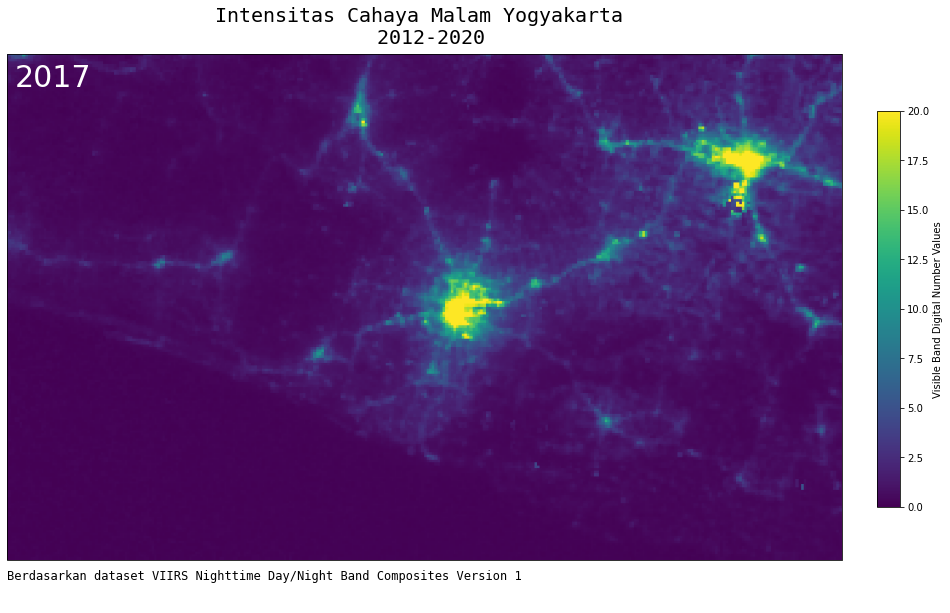

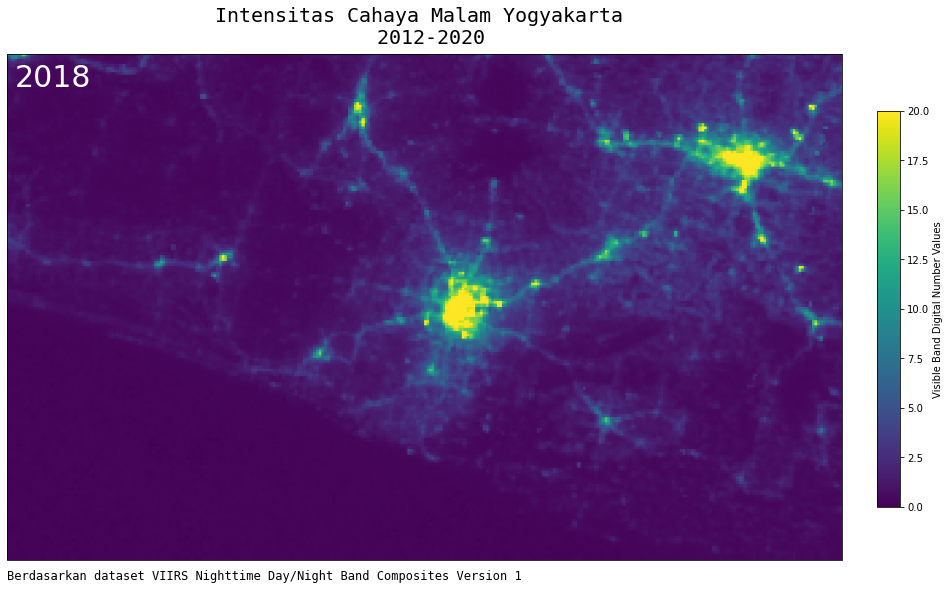

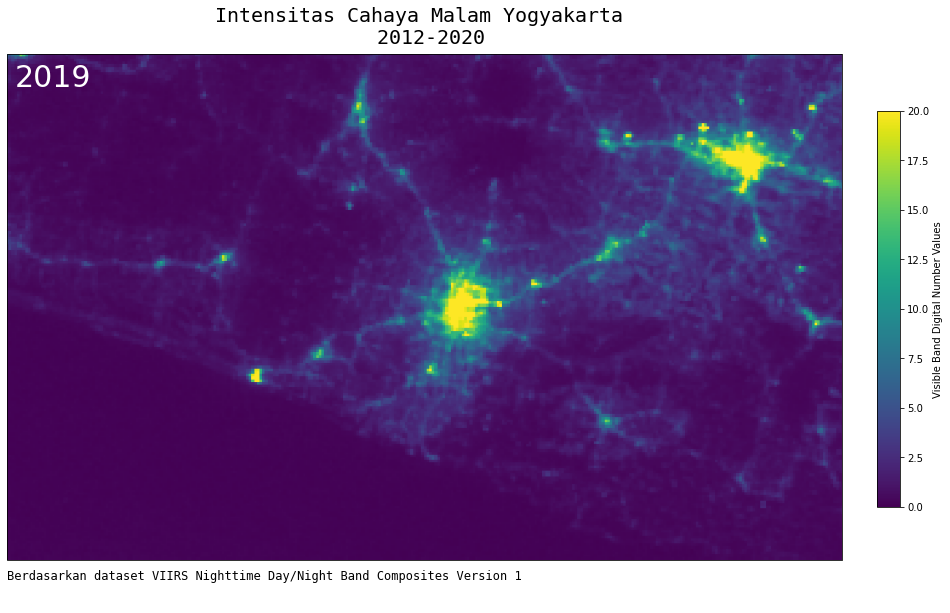

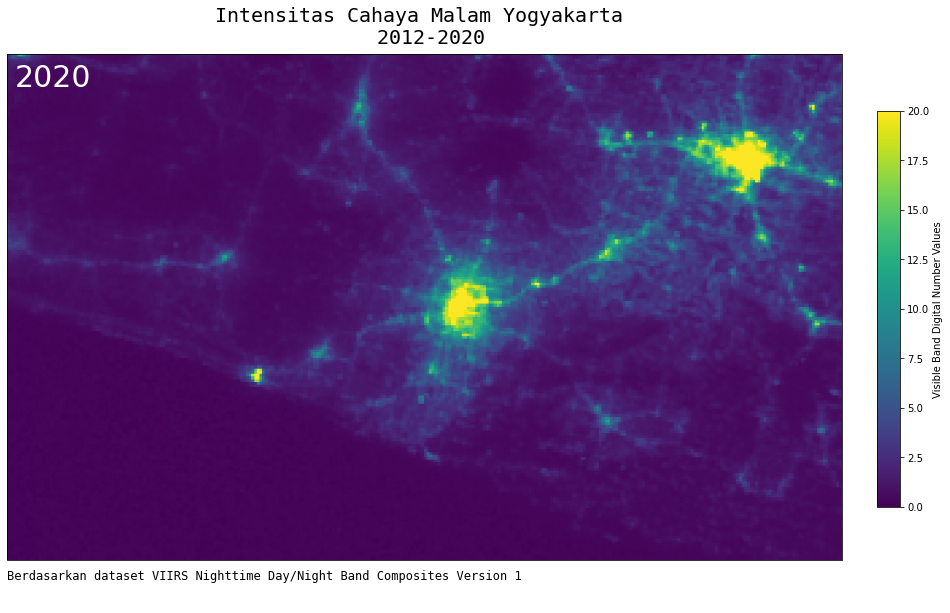

In [20]:
for i in range(2012,2021):
    Tahun = str(i)
#     dataset = ee.ImageCollection('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS').filter(ee.Filter.date(Tahun+'-01-01', Tahun+'-12-31'))
#     nighttime = dataset.select('avg_vis')
#     nighttimeVis = {'min': 3.0,'max': 60.0,}
    dataset = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date(Tahun+'-01-01', Tahun+'-9-01'));
    nighttime = dataset.select('avg_rad');
    nighttimeVis = {'min':0,'max':20};
    fig,ax = plt.subplots(figsize=(16, 11))
    cmap = "viridis"
    ax = cartoee.get_map(nighttime, region=region, vis_params=nighttimeVis,cmap=cmap)
    cartoee.add_colorbar(ax, nighttimeVis,cmap=cmap, label="Visible Band Digital Number Values",loc='right')
    ax.text(110.9550,-8.13,Tahun,**{'size':30,'family':'sans-serif','color':'white'})
    ax.text(110.9670,-7.3676,'Berdasarkan dataset VIIRS Nighttime Day/Night Band Composites Version 1',**{'size':12,'family':'monospace','color':'Black'})
    ax.set_title('Intensitas Cahaya Malam Yogyakarta \n 2012-2020',**{'size':20,'family':'monospace'},pad=10)
    fig.axes[0].spines[:].set_visible(False)
    fig.axes[0].set_xticks([])
    fig.axes[0].set_yticks([])
#     fig.savefig(Tahun+'.png',dpi=200)